In [ ]:
# 9-25-2025

In [92]:
import pandas as pd
import numpy as np
import tensorflow as tf


import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.layers import Normalization

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split

In [51]:
fires = pd.read_csv("fires_with_ndvi.csv")

In [52]:
fires.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,time,ndvi
0,110,2005,2453540.5,10.0,Equipment Use,33.718889,-117.433611,110,73.04,89,0.062992,6.028589,1970-01-01 00:00:00.002453540,5016.0
1,155,2005,2453411.5,3.0,Debris Burning,34.748333,-119.410278,155,58.46,79,0.000000,4.536979,1970-01-01 00:00:00.002453411,3357.0
2,178,2005,2453544.5,4.2,Equipment Use,34.466667,-119.828333,178,77.54,76,0.000000,15.972654,1970-01-01 00:00:00.002453544,4356.0
3,1053,2005,2453559.5,3.0,Miscellaneous,34.479444,-118.768611,1053,82.76,86,0.000000,6.028589,1970-01-01 00:00:00.002453559,3124.0
4,1282,2005,2453582.5,2.0,Lightning,33.110833,-116.847222,1282,87.62,88,0.000000,8.763207,1970-01-01 00:00:00.002453582,4180.0


In [53]:
fires.shape

(2926, 14)

In [54]:
fires = fires.sample(frac=1, random_state = 5)

<Axes: xlabel='temp_max_F', ylabel='Count'>

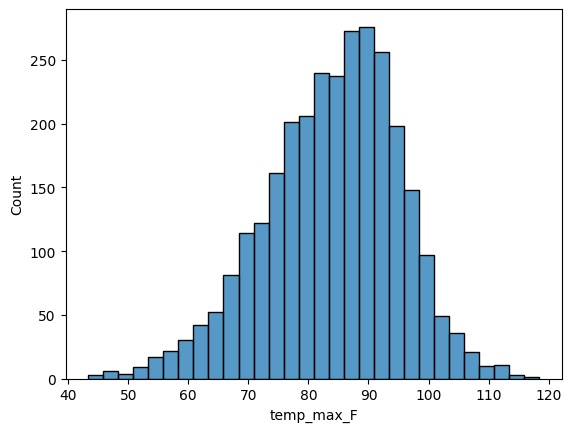

In [55]:
sns.histplot(data=fires, x="temp_max_F", bins=30, kde=False)


<Axes: xlabel='ndvi', ylabel='Count'>

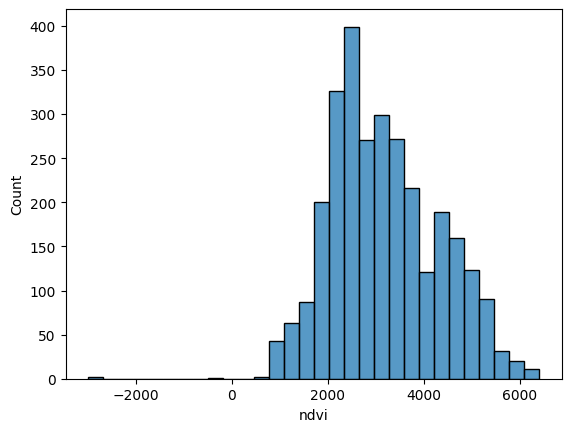

In [56]:
sns.histplot(data=fires, x="ndvi", bins=30, kde=False)


In [57]:
fires.corr(numeric_only=True)

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
OBJECTID,1.000000,0.724785,0.723057,-0.096118,-0.098185,0.044267,1.000000,-0.076047,0.089247,-0.002504,0.024488,-0.079413
FIRE_YEAR,0.724785,1.000000,0.998150,-0.034775,0.012318,-0.073362,0.724785,-0.077494,0.026150,-0.013048,0.052482,0.022508
DISCOVERY_DATE,0.723057,0.998150,1.000000,-0.031879,0.012152,-0.078066,0.723057,-0.066895,0.023370,-0.012887,0.045028,0.029100
FIRE_SIZE,-0.096118,-0.034775,-0.031879,1.000000,0.028925,-0.057219,-0.096118,0.004367,-0.038592,-0.008663,0.023431,0.079080
LATITUDE,-0.098185,0.012318,0.012152,0.028925,1.000000,-0.679641,-0.098185,0.005343,-0.178536,-0.004261,-0.062924,-0.031825
LONGITUDE,0.044267,-0.073362,-0.078066,-0.057219,-0.679641,1.000000,0.044267,0.235064,-0.141372,0.013715,0.034864,-0.228041
OBJECTID.1,1.000000,0.724785,0.723057,-0.096118,-0.098185,0.044267,1.000000,-0.076047,0.089247,-0.002504,0.024488,-0.079413
temp_max_F,-0.076047,-0.077494,-0.066895,0.004367,0.005343,0.235064,-0.076047,1.000000,-0.453242,-0.066382,-0.107019,-0.143312
humidity_pct,0.089247,0.026150,0.023370,-0.038592,-0.178536,-0.141372,0.089247,-0.453242,1.000000,0.089772,-0.032953,0.104203
precip_in,-0.002504,-0.013048,-0.012887,-0.008663,-0.004261,0.013715,-0.002504,-0.066382,0.089772,1.000000,-0.045733,0.022210


In [58]:
fires.describe()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
count,2.926000e+03,2926.000000,2.926000e+03,2926.000000,2926.000000,2926.000000,2.926000e+03,2926.000000,2926.000000,2926.000000,2926.000000,2925.000000
mean,1.119678e+06,2009.356801,2.455157e+06,698.459740,33.847226,-117.369907,1.119678e+06,83.949132,68.571770,0.003938,8.036604,3166.863248
std,6.234096e+05,3.011743,1.093919e+03,8030.910191,0.616454,0.966675,6.234096e+05,11.231815,19.486523,0.020734,2.537002,1137.025054
min,1.100000e+02,2005.000000,2.453406e+06,2.000000,32.552700,-120.574722,1.100000e+02,43.340000,9.000000,0.000000,2.548167,-3000.000000
25%,3.691762e+05,2007.000000,2.454122e+06,3.000000,33.521111,-117.776414,3.691762e+05,76.820000,54.000000,0.000000,6.401492,2331.000000
50%,1.181302e+06,2009.000000,2.455136e+06,6.300000,33.896111,-117.182678,1.181302e+06,85.100000,71.000000,0.000000,7.551274,3020.000000
75%,1.626262e+06,2012.000000,2.456067e+06,32.000000,34.311111,-116.862188,1.626262e+06,91.940000,85.000000,0.000000,9.058421,3923.000000
max,1.880442e+06,2015.000000,2.457382e+06,240207.000000,35.000000,-114.203000,1.880442e+06,118.400000,100.000000,0.551181,28.589186,6407.000000


In [59]:
rows_with_missing = fires[fires.isnull().any(axis=1)]
rows_with_missing


,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,time,ndvi
2574,1788879,2014,2456834.5,21.0,Missing/Undefined,34.411058,-119.877385,1788879,80.06,65,0.0,17.215662,1970-01-01 00:00:00.002456834,NaN


In [60]:
fires = fires.dropna()

In [61]:
fires.describe()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
count,2.925000e+03,2925.000000,2.925000e+03,2925.000000,2925.000000,2925.000000,2.925000e+03,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,1.119450e+06,2009.355214,2.455156e+06,698.691350,33.847033,-117.369049,1.119450e+06,83.950462,68.572991,0.003940,8.033466,3166.863248
std,6.233933e+05,3.011034,1.093666e+03,8032.273574,0.616471,0.965727,6.233933e+05,11.233505,19.489743,0.020737,2.531750,1137.025054
min,1.100000e+02,2005.000000,2.453406e+06,2.000000,32.552700,-120.574722,1.100000e+02,43.340000,9.000000,0.000000,2.548167,-3000.000000
25%,3.691760e+05,2007.000000,2.454122e+06,3.000000,33.521111,-117.775556,3.691760e+05,76.820000,54.000000,0.000000,6.401492,2331.000000
50%,1.181299e+06,2009.000000,2.455132e+06,6.300000,33.896111,-117.182300,1.181299e+06,85.100000,71.000000,0.000000,7.520199,3020.000000
75%,1.626258e+06,2012.000000,2.456066e+06,32.000000,34.311111,-116.862001,1.626258e+06,91.940000,85.000000,0.000000,9.011809,3923.000000
max,1.880442e+06,2015.000000,2.457382e+06,240207.000000,35.000000,-114.203000,1.880442e+06,118.400000,100.000000,0.551181,28.589186,6407.000000


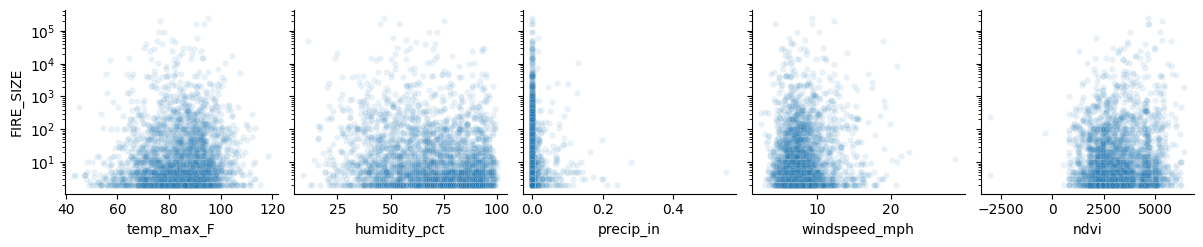

In [62]:
g = sns.pairplot(
    fires,
    x_vars=["temp_max_F", "humidity_pct", "precip_in", "windspeed_mph", "ndvi"],
    y_vars=["FIRE_SIZE"],
    plot_kws={"alpha": 0.1, "s": 20}
)

# Set y-axis to log scale
for ax in g.axes[:, 0]:  # first (and only) column of axes
    ax.set_yscale("log")

plt.show()
# semi log shows streaks in data

In [63]:
fires_data = fires[["FIRE_SIZE","temp_max_F", "humidity_pct", "precip_in", "windspeed_mph", "ndvi"]].copy()
fires_data

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
2797,2.0,95.54,69,0.0,13.486638,1730.0
1790,3.3,93.20,67,0.0,7.271597,2349.0
186,340.0,82.76,72,0.0,8.949658,4448.0
2504,21.6,75.74,69,0.0,6.712244,2227.0
976,8.0,78.80,16,0.0,15.972654,4496.0
...,...,...,...,...,...,...
2121,47.0,80.78,84,0.0,8.328154,3307.0
1424,7.0,79.88,93,0.0,12.865134,4649.0
1725,78.8,102.74,50,0.0,7.147296,832.0
2254,110.0,93.92,60,0.0,7.022996,4583.0


In [64]:
fires_data.corr()

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
FIRE_SIZE,1.000000,0.004357,-0.038598,-0.008668,0.023588,0.079080
temp_max_F,0.004357,1.000000,-0.453276,-0.066406,-0.106832,-0.143312
humidity_pct,-0.038598,-0.453276,1.000000,0.089762,-0.032800,0.104203
precip_in,-0.008668,-0.066406,0.089762,1.000000,-0.045601,0.022210
windspeed_mph,0.023588,-0.106832,-0.032800,-0.045601,1.000000,-0.132715
ndvi,0.079080,-0.143312,0.104203,0.022210,-0.132715,1.000000


In [65]:
fires_data["FIRE_SIZE"] = np.log10(fires_data["FIRE_SIZE"])

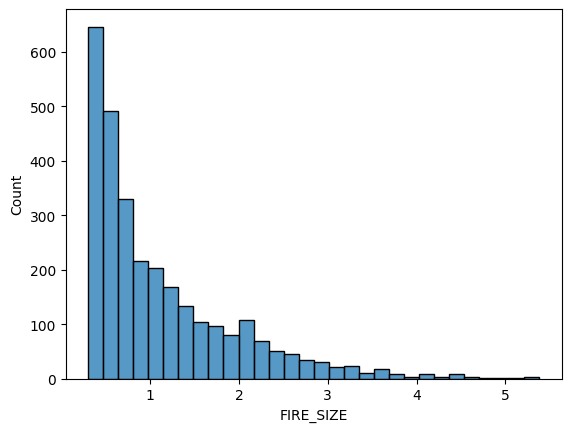

In [66]:
sns.histplot(data=fires_data, x="FIRE_SIZE", bins=30, kde=False)
plt.show()

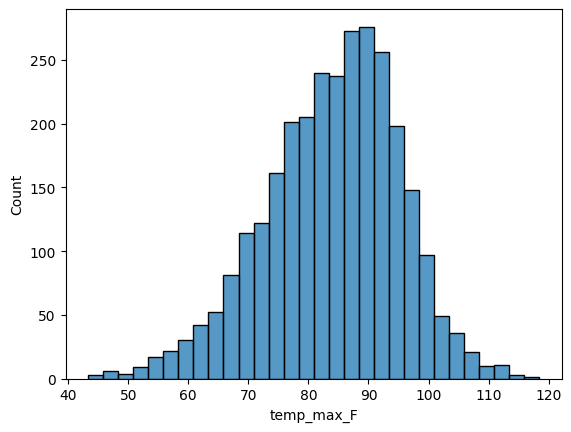

In [67]:
sns.histplot(data=fires_data, x="temp_max_F", bins=30, kde=False)
plt.show()

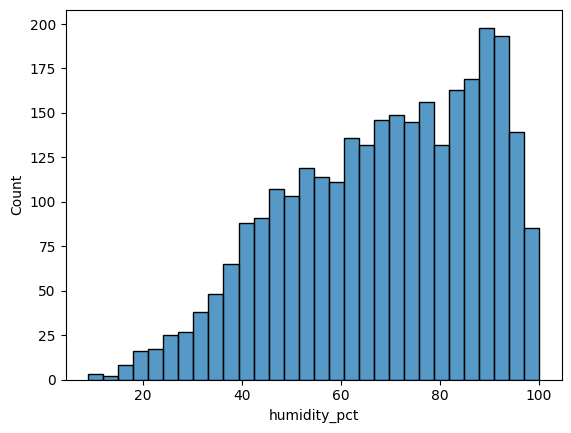

In [68]:
sns.histplot(data=fires_data, x="humidity_pct", bins=30, kde=False)
plt.show()

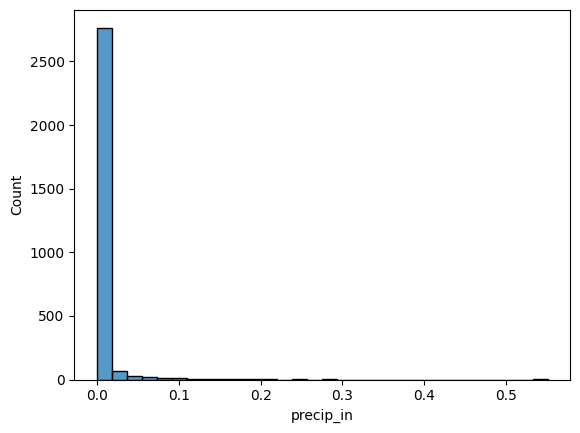

In [69]:
sns.histplot(data=fires_data, x="precip_in", bins=30, kde=False)
plt.show()

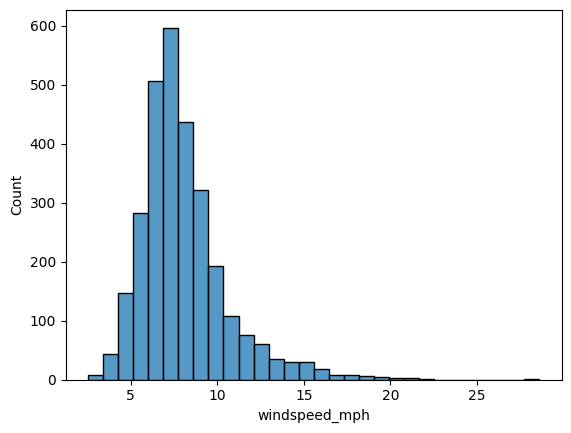

In [70]:
sns.histplot(data=fires_data, x="windspeed_mph", bins=30, kde=False)
plt.show()

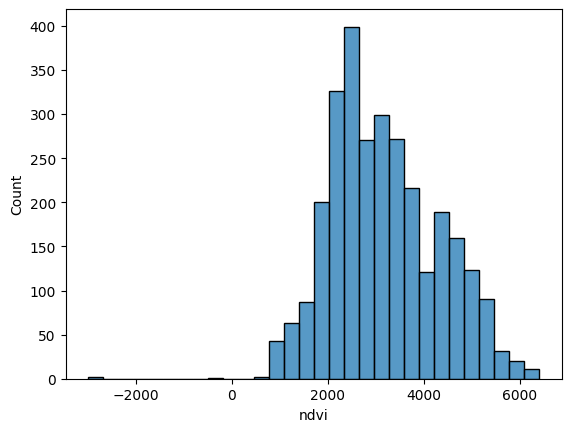

In [71]:
sns.histplot(data=fires_data, x="ndvi", bins=30, kde=False)
plt.show()
# ndvi is normaldist

In [72]:
iqr_cols = ["windspeed_mph"] # not including precip bc it has such a long and small tail, everything's just gonna get clipped
zscore_cols = ["temp_max_F", "humidity_pct"]

In [73]:
for col in iqr_cols:
    Q1 = fires_data[col].quantile(0.25)
    Q3 = fires_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.9 * IQR
    upper = Q3 + 1.9 * IQR
    fires_data[col] = fires_data[col].clip(lower, upper)

In [74]:
k = 3 # 3 std from mean (99.7%)
for col in zscore_cols:
    mean = fires_data[col].mean()
    std = fires_data[col].std()
    lower = mean - k * std
    upper = mean + k * std
    fires_data[col] = fires_data[col].clip(lower, upper)

In [75]:
fires_data

,FIRE_SIZE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
2797,0.301030,95.54,69.0,0.0,13.486638,1730.0
1790,0.518514,93.20,67.0,0.0,7.271597,2349.0
186,2.531479,82.76,72.0,0.0,8.949658,4448.0
2504,1.334454,75.74,69.0,0.0,6.712244,2227.0
976,0.903090,78.80,16.0,0.0,13.971411,4496.0
...,...,...,...,...,...,...
2121,1.672098,80.78,84.0,0.0,8.328154,3307.0
1424,0.845098,79.88,93.0,0.0,12.865134,4649.0
1725,1.896526,102.74,50.0,0.0,7.147296,832.0
2254,2.041393,93.92,60.0,0.0,7.022996,4583.0


In [76]:
X = fires_data.drop("FIRE_SIZE", axis=1)
y = fires_data["FIRE_SIZE"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [78]:
power_cols = ["precip_in", "windspeed_mph"]
standard_cols = ["temp_max_F", "humidity_pct", "ndvi"]

In [79]:
std_scaler = StandardScaler()
pwr_scaler = PowerTransformer()

In [80]:
X_train[standard_cols] = std_scaler.fit_transform(X_train[standard_cols])
X_train[power_cols] = pwr_scaler.fit_transform(X_train[power_cols])


X_test[standard_cols] = std_scaler.transform(X_test[standard_cols])
X_test[power_cols] = pwr_scaler.transform(X_test[power_cols])

In [81]:
X_train

,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi
1191,-2.284273,0.685029,-0.310953,-1.164227,-0.594696
1990,-1.181446,-0.754275,-0.310953,0.044621,0.445292
2513,0.456577,-1.114101,-0.310953,0.632677,-0.982280
567,-1.116574,1.199066,-0.310953,0.657105,-0.249203
2338,-0.273235,1.250470,-0.310953,0.324678,0.577702
...,...,...,...,...,...
2579,-1.278754,-0.600064,-0.310953,0.482217,-0.334261
1381,-0.451633,0.736433,-0.310953,-0.166033,0.134874
2639,-1.489589,1.301873,1.333992,0.351452,0.992470
596,1.024209,-0.445853,-0.310953,-2.313137,-1.073477


In [82]:
y_train

1191    0.301030
1990    0.778151
2513    1.041393
567     0.477121
2338    0.556303
          ...   
2579    2.800717
1381    1.447158
2639    0.903090
596     0.903090
2672    2.324282
Name: FIRE_SIZE, Length: 2340, dtype: float64

In [112]:
model = Sequential([
    Dense(64),
    LeakyReLU(negative_slope=0.1),
    
    Dense(128),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.2),
    
    Dense(128),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.3),
    
    Dense(32),
    LeakyReLU(negative_slope=0.1),
    
    Dense(32),
    LeakyReLU(negative_slope=0.1),
    
    Dense(1)
])

In [120]:
model.compile(optimizer="adam", loss="mae", metrics=["mae"])

In [121]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6142 - mae: 0.6142 - val_loss: 0.6013 - val_mae: 0.6013
Epoch 2/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5934 - mae: 0.5934 - val_loss: 0.6024 - val_mae: 0.6024
Epoch 3/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5839 - mae: 0.5839 - val_loss: 0.6008 - val_mae: 0.6008
Epoch 4/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5912 - mae: 0.5912 - val_loss: 0.5991 - val_mae: 0.5991
Epoch 5/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5898 - mae: 0.5898 - val_loss: 0.6003 - val_mae: 0.6003
Epoch 6/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5936 - mae: 0.5936 - val_loss: 0.6015 - val_mae: 0.6015
Epoch 7/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5830 - mae: 0.5830 - val_loss: 0.5993 - val_mae: 0.5993
Epoch 8/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5924 - mae: 0.5924 - val_loss: 0.6042 - val_mae: 0.6042
Epoch 9/30
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6090 - mae: 

In [122]:
loss = model.evaluate(X_test, y_test)
print(f"Test loss mae: {loss[1]}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6547 - mae: 0.6547 
Test loss mae: 0.6465349197387695


In [116]:
loss # gives mae and mse

[0.7644195556640625, 0.6689721941947937]

In [117]:
y_pred = model.predict(X_test)
y_pred

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[1.3748078 ],
       [0.97982323],
       [1.0628068 ],
       [1.2073358 ],
       [1.1560216 ],
       [1.3583839 ],
       [1.0039487 ],
       [0.9510881 ],
       [1.0893462 ],
       [0.90091985],
       [0.9782753 ],
       [0.9586758 ],
       [1.1926091 ],
       [1.0314783 ],
       [1.068124  ],
       [0.9266212 ],
       [0.8130444 ],
       [1.0213815 ],
       [1.1206677 ],
       [0.684639  ],
       [0.8150165 ],
       [1.33721   ],
       [1.0349014 ],
       [1.2537003 ],
       [1.085371  ],
       [1.1604569 ],
       [1.0457938 ],
       [1.2123833 ],
       [1.2754095 ],
       [1.3238075 ],
       [0.8098567 ],
       [0.98377955],
       [0.970415  ],
       [0.97246635],
       [0.9913361 ],
       [1.0368445 ],
       [1.053336  ],
       [1.1787108 ],
       [0.9800777 ],
       [1.2797348 ],
       [0.9406131 ],
       [1.4583018 ],
       [1.028055  ],
       [0.9271343 ],
       [1.511214  ],
       [0.96650654],
       [1.1556556 ],
       [0.947

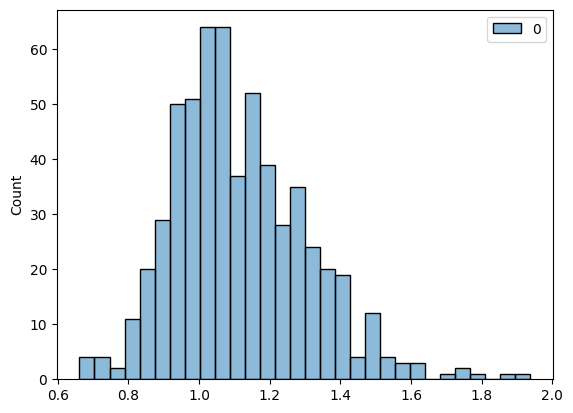

In [118]:
sns.histplot(data=y_pred, bins=30, kde=False)
plt.show()

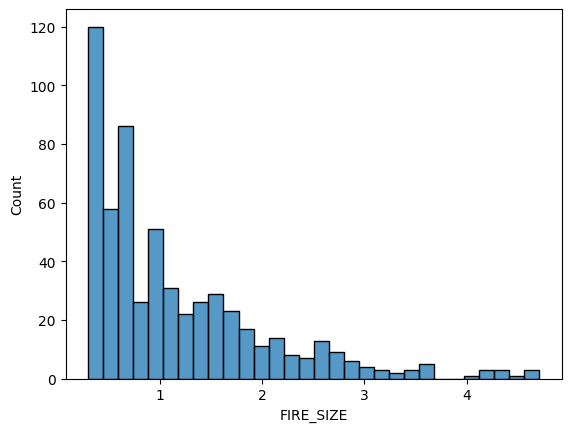

In [119]:
sns.histplot(data=y_test, bins=30, kde=False)
plt.show()

In [ ]:
# changes: 
# added ndvi feature, used z-score scaling
#   had to drop a row from the dataset because the date of that fire was from 1970 and it had no ndvi value
# shuffled the dataset because it seemed that the fires were ordered by date
#   this actually caused the model to do slightly better
# added dropout to the biggest layers in the net
# changed activation to leakyrelu

# after seeing distribution of model predictions, the model is not predicting large fires, it predicted at most a fire of size 50 acres (10^1.7)

# NEED more useful/meaningful features.

In [ ]:
# std for fire size is 0.86 and mean is 1.1.
# that means if the model predicted 1.1 for fire size for every single example it saw, it would have an mae of 0.86
# this should be the benchmark, because if the model gets a worse mae than 0.86 then its doing worse than just guessing the average
# model currently has an mae between .6-.7, meaning it's doing a bit better than the benchmark